In [1]:
import platform
import os
import numpy as np
import matplotlib
from matplotlib import cm, pyplot as plt
import cv2 as cv
from IPython.display import display, Markdown

# import my functions
from imageutils import pdf, entropy, discrete_uniform_noise

# Check Python and library versions for sanity
print("Python v" + platform.python_version())
print("NumPy v" + np.__version__)
print("OpenCV v" + cv.__version__)
print("Matplotlib v" + matplotlib.__version__)

# For reproducible results
np.random.seed(0)


Python v3.7.1
NumPy v1.15.1
OpenCV v3.4.2
Matplotlib v3.0.0


In [2]:
# Load the retina image file
filename = "img_retina.jpg"
assert os.path.isfile(filename)
I = cv.imread(filename, cv.IMREAD_GRAYSCALE)

# Show the original image I
# _ = plt.figure(figsize=(6,6))
# _ = plt.imshow(I, cmap=cm.gray)

# Compute the entropy and use it as the plot title
H_I = entropy(pdf(I))
print("Entropy H(I) = {:7.5f}".format(H_I))
# _ = plt.title("H(I) = {}".format(H_I))

Entropy H(I) = 6.84712


In [3]:
# Build list of the values of noise levels (A)
Amin = 5
Amax = 200
Astep = 5
A = list(range(Amin, Amax+Astep, Astep))
# display(Markdown("A = {}".format(A)))

# Compute additive noise in range [-A, A] for each value of A
NA = [discrete_uniform_noise(I, a) for a in A]

# Add noise to image for each noise level
INA = [(I + na) for na in NA]

# Compute entropy of noise image at each noise level
H_NA = [entropy(pdf(na)) for na in NA]

# Compute entropy of image with noise added for each noise level
H_INA = [entropy(pdf(ina)) for ina in INA]


In [4]:
# Plot the output images I+NA for each value of A,
# displaying the entropy of NA and I+NA in the title

# columns = 4
# rows = (len(A) + columns - 1) // columns
# width = columns * 6
# height = rows * 6
# _ = plt.figure(figsize=(width, height))
# for i, a, na, h_na, ina, h_ina in zip(range(1, len(A)+1), A, NA, H_NA, INA, H_INA):
#     _ = plt.subplot(rows, columns, i)
#     _ = plt.title("A={:<3} H(NA)={:6.4f}  H(I+NA)={:6.4f}".format(a, h_na, h_ina))
#     _ = plt.imshow(ina, cmap=cm.gray)
# _ = plt.show()


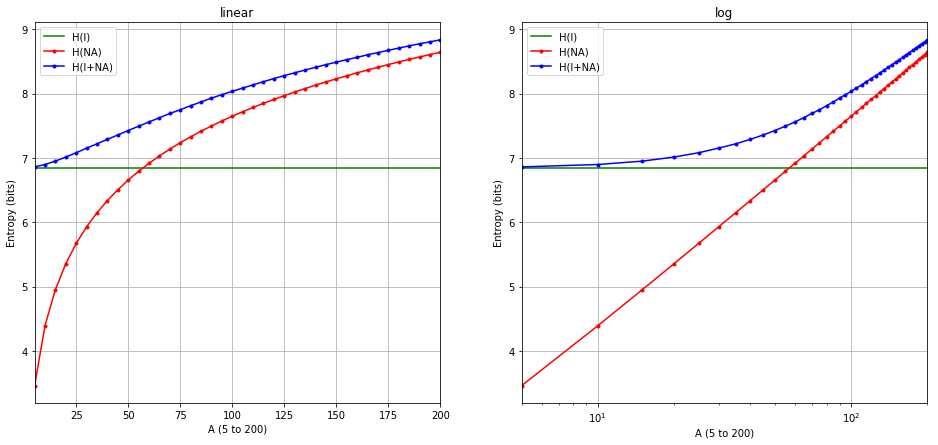

In [8]:
# Plot entropy of I, NA, and I+NA as a function of A on linear and symlog scales
width = 16
height = 7
_ = plt.figure(figsize=(width, height))
for i, scale in enumerate(("linear", "log"), 1):
    _ = plt.subplot(1, 2, i)
    lines = plt.plot(A, [H_I] * len(A), 'g-', A, H_NA, 'r.-', A, H_INA, 'b.-')
    _ = plt.title(scale)
    _ = plt.xscale(scale)
    _ = plt.xlim(Amin, Amax)
    _ = plt.xlabel("A ({} to {})".format(Amin, Amax))
    _ = plt.ylabel("Entropy (bits)")
    _ = plt.grid(True)
    _ = plt.legend(lines, ("H(I)", "H(NA)", "H(I+NA)"))
_ = plt.show()


The entropy $H(I)$ of the original image $I$ (green line) does not depend on A and remains constant.
Meanwhile, we observe that the entropy $H(N_A)$ of the noise image $N_A$ (red line) increases logarithmically with $A$.
$$H(N_A) = -\sum_{k=-A}^{A}{p(x_k)\log_2{p(x_k)}}$$

For a uniform distribution over the $2A+1$ bins of the range [-A, A], we know that for all $k$:
$$p(x_k) = \frac{1}{2A+1}$$

Substituting in the above sum, we get:
$$H(N_A) = -\sum_{k=-A}^{A}{\frac{\log_2{\frac{1}{2A+1}}}{2A+1}}
= -(2A+1)\frac{-\log_2{(2A+1)}}{2A+1}
= \log_2{(2A+1)}$$

For $A \gg 1$,
$$H(N_A) \approx \log_2{(2A)} = 1 + \log_2{A}$$

This is confirmed empirically by eyeballing the graph at $A = 125$:

$$H(N_A) \approx 1+\log_2{(125)} \approx 8$$

Turning our attention to the output image $I+N_A$ , we see that its entropy entropy $H(I+N_A)$ (blue line) is governed primarily by $H(I)$ for small values of $A$ but then governed primarily by $H(N_A)$ for large values of $A$. This makes sense because the effect of adding the noise is to increase the number of potential values (bins) for the pixels of $I+N_A$, and as $A$ increases, we should expect the pixel values of the original image $I$ to get spread randomly across an increasing number of bins, such that eventually the original image content is dissipated into noise:

$$\lim_{A\to\infty} H(I+N_A) \approx H(N_A)$$